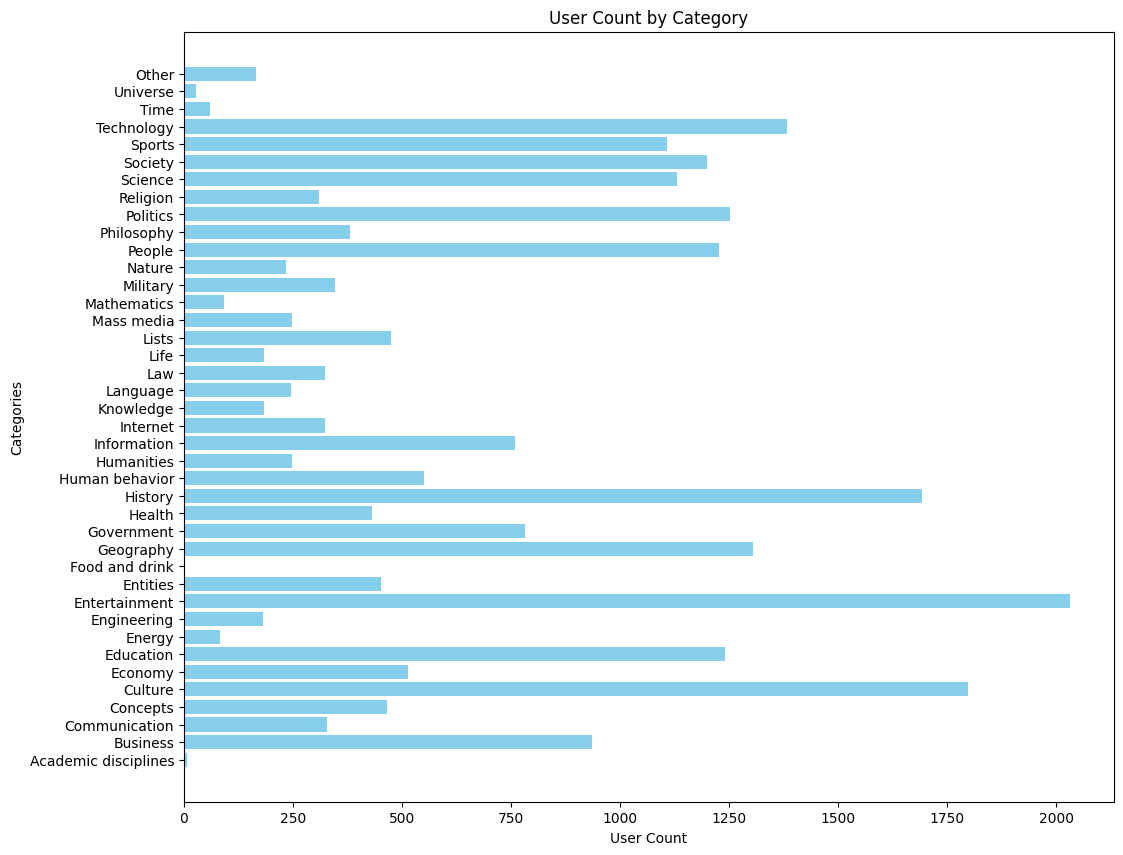

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
import re
import os

# Read the data from classifications.txt file
file_path = os.path.join('..', '..', 'data', 'classifications.txt')
data = []
with open(file_path, 'r', encoding='utf-8') as file:
    for line in file:
        # Match format "Username: Topic1, Topic2, ..."
        match = re.match(r'^(.*?):\s*(.*)$', line.strip())
        if match:
            user = match.group(1).strip()
            topics_str = match.group(2)
            # Split topics by commas and 'and' conjunctions, then clean spaces
            topics = [topic.strip() for topic in re.split(r',|\band\b', topics_str)]
            data.append({"user": user, "topics": topics})

# Convert the data to a DataFrame
df = pd.DataFrame(data)

# Count occurrences of each topic across all users
topic_counts = Counter(topic for topics in df["topics"] for topic in topics)

# Provided categories list
categories = [
    "Academic disciplines", "Business", "Communication", "Concepts", "Culture", "Economy", "Education", "Energy",
    "Engineering", "Entertainment", "Entities", "Food and drink", "Geography", "Government", "Health", "History",
    "Human behavior", "Humanities", "Information", "Internet", "Knowledge", "Language", "Law", "Life", "Lists", 
    "Mass media", "Mathematics", "Military", "Nature", "People", "Philosophy", "Politics", "Religion", "Science", 
    "Society", "Sports", "Technology", "Time", "Universe", "Other"
]

# Creating a DataFrame for the counts, using the provided category order
topic_counts_df = pd.DataFrame({"Topic": categories})
topic_counts_df["Count"] = topic_counts_df["Topic"].map(topic_counts).fillna(0).astype(int)

# Plotting the topics with their counts in the order provided
plt.figure(figsize=(12, 10))
plt.barh(topic_counts_df["Topic"], topic_counts_df["Count"], color="skyblue")
plt.xlabel("User Count")
plt.ylabel("Categories")
plt.title("User Count by Category")
plt.show()


In [2]:
# Get the top 5 and bottom 5 topics
top_5_topics = topic_counts_df.nlargest(5, 'Count')
bottom_5_topics = topic_counts_df.nsmallest(5, 'Count')

# Display the results
print("Top 5 Topics:")
print(top_5_topics)
print("\nBottom 5 Topics:")
print(bottom_5_topics)

Top 5 Topics:
            Topic  Count
9   Entertainment   2031
4         Culture   1797
15        History   1693
36     Technology   1384
12      Geography   1305

Bottom 5 Topics:
                   Topic  Count
11        Food and drink      0
0   Academic disciplines      7
38              Universe     28
37                  Time     60
7                 Energy     82


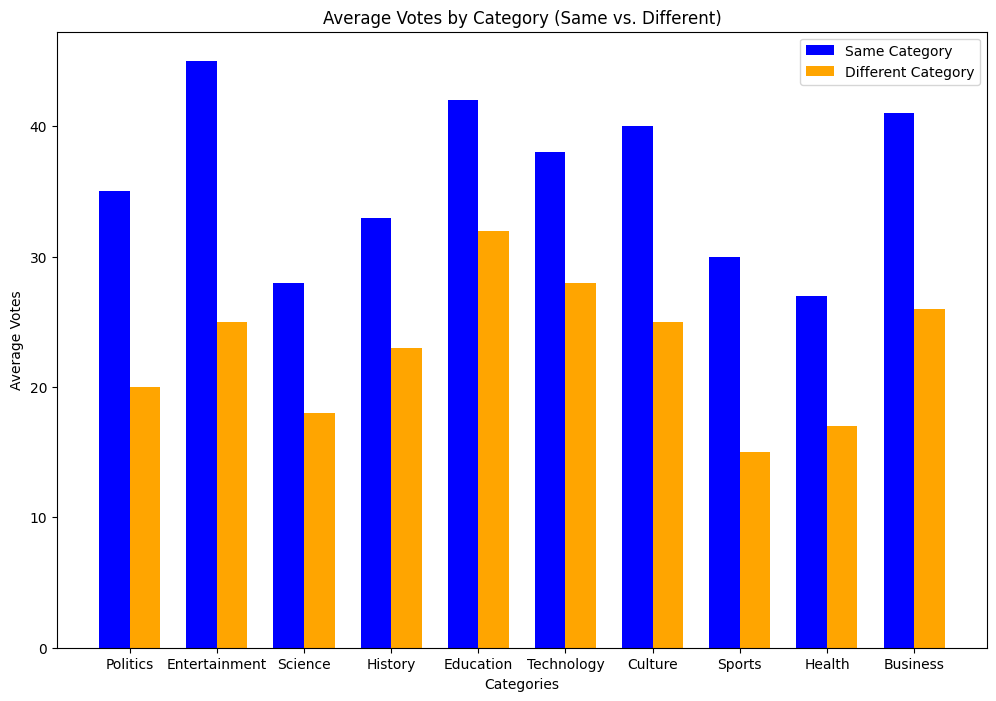

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Replace these with actual data: The 10 largest categories
categories = ['Politics', 'Entertainment', 'Science', 'History', 'Education', 
              'Technology', 'Culture', 'Sports', 'Health', 'Business']

# Replace with actual computed means for each category
# Mean votes for "Same Category" and "Different Category" for the 10 largest categories
mean_votes_same_category = [35, 45, 28, 33, 42, 38, 40, 30, 27, 41]  # Placeholder data
mean_votes_diff_category = [20, 25, 18, 23, 32, 28, 25, 15, 17, 26]  # Placeholder data

# Plotting "Same Category" and "Different Category" side by side for each category
fig, ax = plt.subplots(figsize=(12, 8))
bar_width = 0.35
index = np.arange(len(categories))

# Bars for Same Category
ax.bar(index, mean_votes_same_category, bar_width, label='Same Category', color='blue')

# Bars for Different Category
ax.bar(index + bar_width, mean_votes_diff_category, bar_width, label='Different Category', color='orange')

# Adding labels, title, and legend
ax.set_xlabel('Categories')
ax.set_ylabel('Average Votes')
ax.set_title('Average Votes by Category (Same vs. Different)')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(categories)
ax.legend()

plt.show()


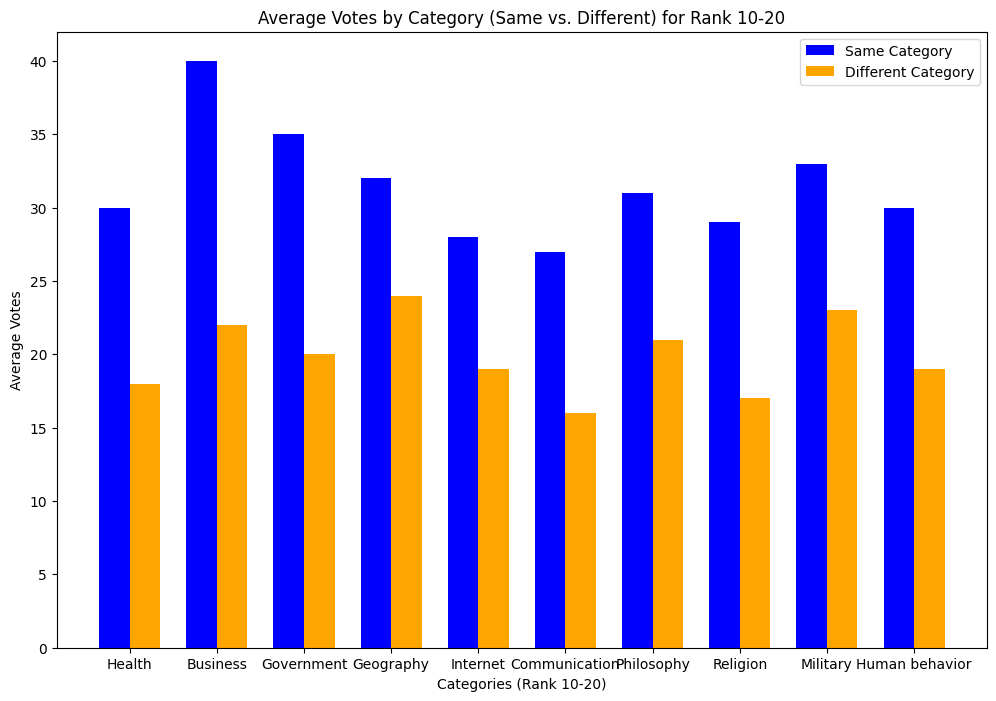

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Top categories ranked 10 to 20 in terms of user count
next_categories = ['Health', 'Business', 'Government', 'Geography', 'Internet', 
                   'Communication', 'Philosophy', 'Religion', 'Military', 'Human behavior']

# Replace with actual computed means for each category in the 10-20 range
mean_votes_same_category_10_20 = [30, 40, 35, 32, 28, 27, 31, 29, 33, 30]  # Placeholder data
mean_votes_diff_category_10_20 = [18, 22, 20, 24, 19, 16, 21, 17, 23, 19]  # Placeholder data

# Plotting for categories ranked 10-20
fig, ax = plt.subplots(figsize=(12, 8))
bar_width = 0.35
index = np.arange(len(next_categories))

# Bars for Same Category
ax.bar(index, mean_votes_same_category_10_20, bar_width, label='Same Category', color='blue')

# Bars for Different Category
ax.bar(index + bar_width, mean_votes_diff_category_10_20, bar_width, label='Different Category', color='orange')

# Adding labels, title, and legend
ax.set_xlabel('Categories (Rank 10-20)')
ax.set_ylabel('Average Votes')
ax.set_title('Average Votes by Category (Same vs. Different) for Rank 10-20')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(next_categories)
ax.legend()

plt.show()


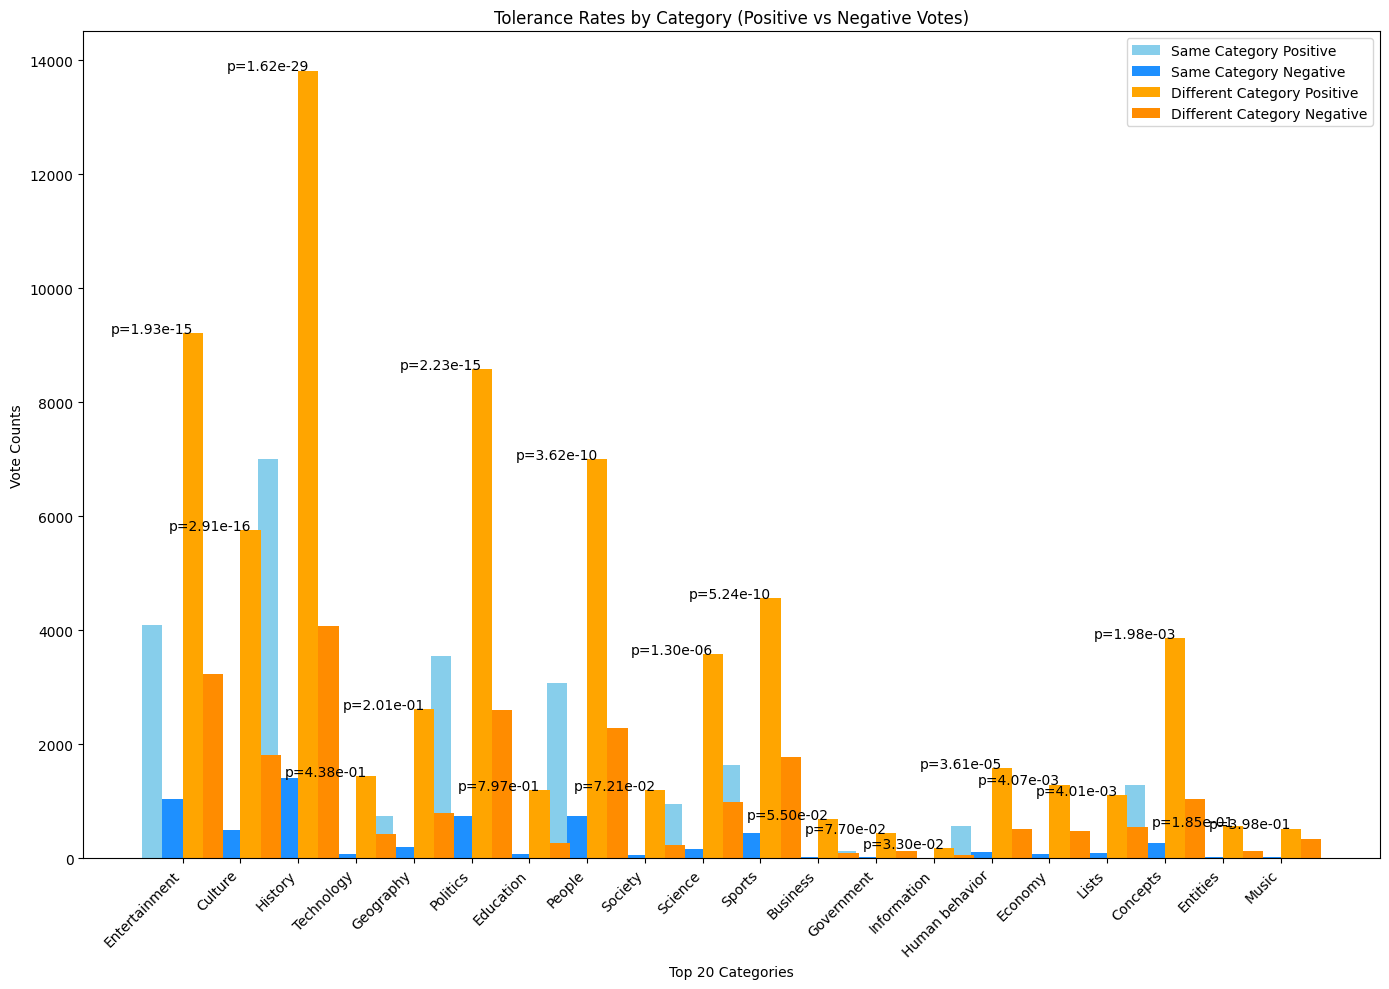

In [5]:
import re
import pandas as pd
from collections import Counter
from scipy.stats import chi2_contingency
import matplotlib.pyplot as plt

# Parse classifications.txt to create a category mapping for each user
category_mapping = {}
with open('../../data/classifications.txt', 'r', encoding='utf-8') as f:
    for line in f:
        line = line.strip()
        if not line or line.startswith("Here are the classifications"):  # Skip empty or irrelevant lines
            continue
        
        # Extract the username and categories
        match = re.match(r'^(.*?):\s*(.*)$', line)
        if match:
            user, categories_str = match.groups()
            categories = [cat.strip() for cat in categories_str.split(",")]
            category_mapping[user.strip()] = categories

# Flatten the category list to count occurrences and get the top 20 categories
all_categories = [cat for categories in category_mapping.values() for cat in categories]
top_20_categories = [cat for cat, _ in Counter(all_categories).most_common(20)]

# Parse wiki-RfA.txt to extract votes and determine "Same Category" or "Different Category"
data = {
    "SRC": [],
    "TGT": [],
    "VOT": [],
    "Category_Same": [],  # New column to track if category matches
    "SRC_Category": [],  # Store source category
}

with open('../../data/wiki-RfA.txt', 'r', encoding='utf-8') as file:
    record = {}
    for line in file:
        line = line.strip()
        
        # Check if line is empty (end of a record)
        if not line:
            # Save the current record if it has data and reset
            if record:
                src_cat = set(category_mapping.get(record.get("SRC", ""), []))
                tgt_cat = set(category_mapping.get(record.get("TGT", ""), []))
                record["Category_Same"] = int(bool(src_cat & tgt_cat))  # 1 if any category matches, else 0
                record["SRC_Category"] = list(src_cat & set(top_20_categories))  # Intersection with top categories
                
                # Append record to data dictionary
                data["SRC"].append(record.get("SRC", ""))
                data["TGT"].append(record.get("TGT", ""))
                data["VOT"].append(int(record.get("VOT", 0)))
                data["Category_Same"].append(record["Category_Same"])
                data["SRC_Category"].append(record["SRC_Category"][0] if record["SRC_Category"] else None)
                record = {}
            continue
        
        # Match each line with its prefix and store it in the record dictionary
        match = re.match(r"^(SRC|TGT|VOT):(.*)$", line)
        if match:
            key, value = match.groups()
            record[key] = value.strip()

    # Add the last record if any data is left
    if record:
        src_cat = set(category_mapping.get(record.get("SRC", ""), []))
        tgt_cat = set(category_mapping.get(record.get("TGT", ""), []))
        record["Category_Same"] = int(bool(src_cat & tgt_cat))
        record["SRC_Category"] = list(src_cat & set(top_20_categories))
        
        data["SRC"].append(record.get("SRC", ""))
        data["TGT"].append(record.get("TGT", ""))
        data["VOT"].append(int(record.get("VOT", 0)))
        data["Category_Same"].append(record["Category_Same"])
        data["SRC_Category"].append(record["SRC_Category"][0] if record["SRC_Category"] else None)

# Convert data into a DataFrame
df = pd.DataFrame(data)

#Analyze tolerance rates for each of the 20 biggest categories
results = []
for category in top_20_categories:
    # Filter votes by users in the current category
    category_votes = df[df['SRC_Category'] == category]
    
    # Calculate positive and negative vote counts within and outside the category
    same_category_votes = category_votes[category_votes['Category_Same'] == 1]
    diff_category_votes = category_votes[category_votes['Category_Same'] == 0]
    
    same_pos_count = (same_category_votes['VOT'] == 1).sum()
    same_neg_count = (same_category_votes['VOT'] == -1).sum()
    diff_pos_count = (diff_category_votes['VOT'] == 1).sum()
    diff_neg_count = (diff_category_votes['VOT'] == -1).sum()
    
    # Set up contingency table and perform chi-square test
    contingency_table = [[same_pos_count, same_neg_count], [diff_pos_count, diff_neg_count]]
    chi2, p_value, _, _ = chi2_contingency(contingency_table)
    
    # Append results for this category
    results.append({
        "Category": category,
        "Same_Pos": same_pos_count,
        "Same_Neg": same_neg_count,
        "Diff_Pos": diff_pos_count,
        "Diff_Neg": diff_neg_count,
        "p_value": p_value
    })

# Convert results to a DataFrame for display and plotting
results_df = pd.DataFrame(results)

# Plotting the results as a grouped bar chart
fig, ax = plt.subplots(figsize=(14, 10))
bar_width = 0.35
index = range(len(results_df))

# Bars for same-category positive and negative votes
ax.bar(index, results_df["Same_Pos"], bar_width, label="Same Category Positive", color="skyblue")
ax.bar([i + bar_width for i in index], results_df["Same_Neg"], bar_width, label="Same Category Negative", color="dodgerblue")

# Bars for different-category positive and negative votes
ax.bar([i + 2 * bar_width for i in index], results_df["Diff_Pos"], bar_width, label="Different Category Positive", color="orange")
ax.bar([i + 3 * bar_width for i in index], results_df["Diff_Neg"], bar_width, label="Different Category Negative", color="darkorange")

# Adding labels, title, and legend
ax.set_xlabel("Top 20 Categories")
ax.set_ylabel("Vote Counts")
ax.set_title("Tolerance Rates by Category (Positive vs Negative Votes)")
ax.set_xticks([i + 1.5 * bar_width for i in index])
ax.set_xticklabels(results_df["Category"], rotation=45, ha="right")
ax.legend()

# Display the p-values for each category as annotations
for i, p_value in enumerate(results_df["p_value"]):
    ax.text(i, max(results_df["Same_Pos"][i], results_df["Same_Neg"][i], results_df["Diff_Pos"][i], results_df["Diff_Neg"][i]) + 5, 
            f"p={p_value:.2e}", ha="center")

plt.tight_layout()
plt.show()


In [6]:
# Select and rename columns for clarity
results_table = results_df[["Category", "Same_Pos", "Same_Neg", "Diff_Pos", "Diff_Neg", "p_value"]]
results_table.columns = ["Category", "Same Category Positive Votes", "Same Category Negative Votes", "Different Category Positive Votes", "Different Category Negative Votes", "p-value"]

# Display the table
print("Tolerance Analysis Results")
print(results_table)

Tolerance Analysis Results
          Category  Same Category Positive Votes  \
0    Entertainment                          4100   
1          Culture                          2479   
2          History                          7003   
3       Technology                           276   
4        Geography                           738   
5         Politics                          3555   
6        Education                           315   
7           People                          3066   
8          Society                           344   
9          Science                           950   
10          Sports                          1637   
11        Business                           177   
12      Government                           125   
13     Information                            24   
14  Human behavior                           565   
15         Economy                           318   
16           Lists                           261   
17        Concepts                   

Success rates by category:
                Success_Rate
SRC_Category                
Business            0.899160
Concepts            0.916119
Culture             0.913193
Economy             0.906479
Education           0.911499
Entertainment       0.903462
Entities            0.942127
Geography           0.925117
Government          0.911433
History             0.929346
Human behavior      0.918954
Information         0.922727
Lists               0.948169
Music               0.945092
People              0.933438
Politics            0.933123
Science             0.920780
Society             0.910006
Sports              0.854917
Technology          0.916443
Chi-square test result: chi2 = 578.356606621382, p-value = 1.85209997645946e-110
Statistically significant association between category and RfA success.


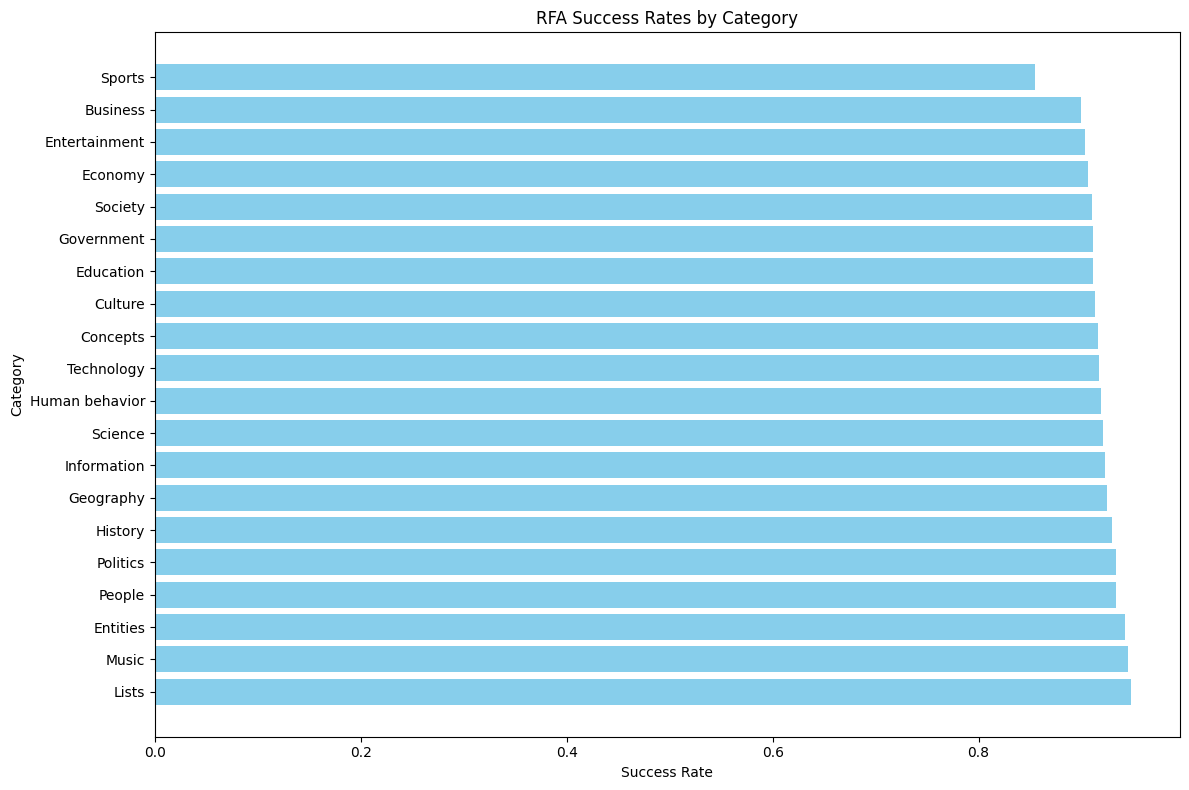

In [7]:
import pandas as pd
import re
from collections import Counter
from scipy.stats import chi2_contingency
import matplotlib.pyplot as plt

#Load and Parse `classifications.txt` to create a category mapping for each user
category_mapping = {}
with open('../../data/classifications.txt', 'r', encoding='utf-8') as f:
    for line in f:
        line = line.strip()
        if not line or line.startswith("Here are the classifications"):
            continue
        # Extract the username and categories
        match = re.match(r'^(.*?):\s*(.*)$', line)
        if match:
            user, categories_str = match.groups()
            categories = [cat.strip() for cat in categories_str.split(",")]
            category_mapping[user.strip()] = categories

# Flatten to find the top 20 categories
all_categories = [cat for categories in category_mapping.values() for cat in categories]
top_20_categories = [cat for cat, _ in Counter(all_categories).most_common(20)]

#Load and Parse `wiki-RfA.txt` for RfA outcomes, linking with categories
data = {
    "SRC": [],
    "RFA_Success": [],
    "SRC_Category": []
}

with open('../../data/wiki-RfA.txt', 'r', encoding='utf-8') as file:
    record = {}
    for line in file:
        line = line.strip()
        
        # Check for end of a record
        if not line:
            if record:
                src_cat = list(set(category_mapping.get(record.get("SRC", ""), [])) & set(top_20_categories))
                record["SRC_Category"] = src_cat[0] if src_cat else None
                
                data["SRC"].append(record.get("SRC", ""))
                data["RFA_Success"].append(int(record.get("VOT", 0)))  # Assuming '1' = success, '0' = failure
                data["SRC_Category"].append(record["SRC_Category"])
                record = {}
            continue
        
        # Match and store each line with its prefix
        match = re.match(r"^(SRC|VOT):(.*)$", line)
        if match:
            key, value = match.groups()
            record[key] = value.strip()

# Convert to DataFrame
df = pd.DataFrame(data)

# Filter out rows with no category (optional, if only interested in top 20 categories)
df = df.dropna(subset=['SRC_Category'])


# Calculate success and failure counts per category
# Create separate columns for failures and successes to avoid mismatches
success_data = df.groupby('SRC_Category')['RFA_Success'].value_counts().unstack(fill_value=0)
success_data = success_data[[0, 1]]  # Keep only the columns for '0' (Failures) and '1' (Successes)
success_data.columns = ['Failures', 'Successes']  # Rename columns for clarity
success_data['Total'] = success_data['Failures'] + success_data['Successes']
success_data['Success_Rate'] = success_data['Successes'] / success_data['Total']

# Display success rates for each category
print("Success rates by category:")
print(success_data[['Success_Rate']])

#  Perform a chi-square test for independence
contingency_table = success_data[['Failures', 'Successes']].T
chi2, p_value, _, _ = chi2_contingency(contingency_table)

# Display chi-square test results
print(f"Chi-square test result: chi2 = {chi2}, p-value = {p_value}")
if p_value < 0.05:
    print("Statistically significant association between category and RfA success.")
else:
    print("No statistically significant association between category and RfA success.")

# Plotting success rates by category
success_data_sorted = success_data.sort_values(by='Success_Rate', ascending=False)
plt.figure(figsize=(12, 8))
plt.barh(success_data_sorted.index, success_data_sorted['Success_Rate'], color='skyblue')
plt.xlabel('Success Rate')
plt.ylabel('Category')
plt.title('RFA Success Rates by Category')
plt.tight_layout()
plt.show()


In [8]:
import re
import pandas as pd
from scipy.stats import linregress
import matplotlib.pyplot as plt

# Load `wiki-RfA.txt` to extract votes, dates, and categories
data = {
    "SRC": [],
    "TGT": [],
    "VOT": [],
    "DAT": []  # Temporarily keep 'DAT' as text for debugging
}

with open('../../data/wiki-RfA.txt', 'r', encoding='utf-8') as file:
    record = {}
    for line in file:
        line = line.strip()
        
        # Check if line is empty (end of a record)
        if not line:
            if record:
                # Add data to dictionary, with 'DAT' as-is for now
                data["SRC"].append(record.get("SRC", ""))
                data["TGT"].append(record.get("TGT", ""))
                data["VOT"].append(int(record.get("VOT", 0)))
                data["DAT"].append(record.get("DAT", ""))  # Keep 'DAT' as raw text for inspection
                record = {}
            continue
        
        # Match each line by prefix
        match = re.match(r"^(SRC|TGT|VOT|DAT):(.*)$", line)
        if match:
            key, value = match.groups()
            record[key] = value.strip()

# Convert data into a DataFrame
df = pd.DataFrame(data)
print(f"Total unique voters in data: {df['SRC'].nunique()}")

# Proceed with date parsing if 'DAT' appears consistent
df['Date'] = pd.to_datetime(df['DAT'], errors='coerce', format='%H:%M, %d %B %Y')
df.dropna(subset=['Date'], inplace=True)  # Remove any rows with invalid dates
df['Year'] = df['Date'].dt.year


# Calculate positivity ratio per voter per year
# Positivity ratio: positive votes / total votes per user per year
voter_yearly_tolerance = df.groupby(['SRC', 'Year'])['VOT'].apply(
    lambda x: (x == 1).sum() / len(x) if len(x) > 0 else 0
).reset_index(name='Positivity_Ratio')

single_year_voters = voter_yearly_tolerance.groupby('SRC').filter(lambda x: len(x) == 1)['SRC'].nunique()
print(f"Voters with data for only one year: {single_year_voters}")

# Analyze trend for each voter using linear regression
voter_trends = []
for voter in voter_yearly_tolerance['SRC'].unique():
    voter_data = voter_yearly_tolerance[voter_yearly_tolerance['SRC'] == voter]
    if len(voter_data) > 1:  # Ensure multiple years of data for trend analysis
        slope, _, _, p_value, _ = linregress(voter_data['Year'], voter_data['Positivity_Ratio'])
        trend = 'Constant'
        if slope > 0 and p_value < 0.05:
            trend = 'More Lenient'
        elif slope < 0 and p_value < 0.05:
            trend = 'More Strict'
        voter_trends.append({
            'Voter': voter,
            'Trend': trend,
            'Slope': slope,
            'p_value': p_value
        })

# Convert to DataFrame for analysis
voter_trends_df = pd.DataFrame(voter_trends)


#  Summarize and plot the trends
if not voter_trends_df.empty:
    print("Summary of Voter Tolerance Trends Over Time:")
    print(voter_trends_df['Trend'].value_counts())

 
else:
    print("No data available in voter_trends_df. Ensure there are multiple years of data per voter.")



Total unique voters in data: 10417
Voters with data for only one year: 5984
Summary of Voter Tolerance Trends Over Time:
Trend
Constant        2377
More Strict      786
More Lenient     680
Name: count, dtype: int64


In [9]:
import pandas as pd
from scipy.stats import chi2_contingency
from collections import Counter

# Ensure categories are mapped correctly in voter_trends_df
voter_trends_df['Categories'] = voter_trends_df['Voter'].map(category_mapping).apply(lambda x: x if isinstance(x, list) else [])

# Calculate the overall trend distribution
overall_trend_counts = voter_trends_df['Trend'].value_counts()
total_voters = overall_trend_counts.sum()
overall_trend_distribution = (overall_trend_counts / total_voters).to_dict()

# Identify top 20 most populated categories
category_counts = Counter()
for categories_list in voter_trends_df['Categories']:
    if categories_list:
        for category in categories_list:
            category_counts[category] += 1

top_20_categories = [category for category, _ in category_counts.most_common(20)]

# Calculate trend distribution for each of the top 20 categories and create table data
table_data = []
for category in top_20_categories:
    # Count the number of voters with each trend in the current category
    trend_counts = {'More Lenient': 0, 'More Strict': 0, 'Constant': 0}
    for _, row in voter_trends_df.iterrows():
        if row['Categories'] and category in row['Categories']:
            trend_counts[row['Trend']] += 1
    
    # Calculate percentages for each trend
    category_total = sum(trend_counts.values())
    more_lenient_pct = (trend_counts['More Lenient'] / category_total) * 100 if category_total > 0 else 0
    more_strict_pct = (trend_counts['More Strict'] / category_total) * 100 if category_total > 0 else 0
    constant_pct = (trend_counts['Constant'] / category_total) * 100 if category_total > 0 else 0

    # Create observed and expected arrays for chi-square test
    observed = [trend_counts['More Lenient'], trend_counts['More Strict'], trend_counts['Constant']]
    expected = [overall_trend_distribution[trend] * category_total for trend in ['More Lenient', 'More Strict', 'Constant']]
    
    # Calculate chi-square distance and p-value
    chi2, p_value = chi2_contingency([observed, expected])[:2]
    
    # Append row to table data
    table_data.append({
        'Category': category,
        'More Lenient (%)': f"{more_lenient_pct:.2f}",
        'More Strict (%)': f"{more_strict_pct:.2f}",
        'Constant (%)': f"{constant_pct:.2f}",
        'Chi-square Distance': f"{chi2:.4f}",
        'p-value': f"{p_value:.4f}"
    })

# Convert to DataFrame for display
table_df = pd.DataFrame(table_data)

# Display the table sorted by Chi-square distance
table_df = table_df.sort_values(by='Chi-square Distance', ascending=False)


# Calculate the overall trend distribution in percentages
overall_trend_distribution_pct = {
    trend: (count / total_voters) * 100 for trend, count in overall_trend_counts.items()
}

# Display the overall trend distribution
overall_distribution = {
    'Category': 'Overall',
    'More Lenient (%)': f"{overall_trend_distribution_pct['More Lenient']:.2f}",
    'More Strict (%)': f"{overall_trend_distribution_pct['More Strict']:.2f}",
    'Constant (%)': f"{overall_trend_distribution_pct['Constant']:.2f}",
    'Chi-square Distance': 'N/A',  # No Chi-square comparison for overall
    'p-value': 'N/A'
}

# Append the overall distribution to the table for comparison
table_df = pd.concat([pd.DataFrame([overall_distribution]), table_df], ignore_index=True)

# Display the table
print("Trend Distribution by Category with Chi-square Comparison:")
print(table_df)



Trend Distribution by Category with Chi-square Comparison:
          Category More Lenient (%) More Strict (%) Constant (%)  \
0          Overall            17.69           20.45        61.85   
1       Technology            21.05           15.57        63.38   
2        Education            14.32           17.48        68.20   
3    Entertainment            20.30           18.37        61.33   
4       Government            14.58           23.96        61.46   
5         Entities            14.97           17.01        68.03   
6           People            15.10           21.23        63.68   
7           Health            15.29           17.65        67.06   
8         Politics            16.42           19.16        64.42   
9         Business            16.33           18.67        65.00   
10           Lists            17.86           17.26        64.88   
11          Sports            19.17           18.69        62.14   
12         Culture            16.11           20.85      

In [10]:
# Calculate tolerance rates for each category
results_df['Same Category Tolerance Rate'] = results_df['Same_Pos'] / (results_df['Same_Pos'] + results_df['Same_Neg'])
results_df['Different Category Tolerance Rate'] = results_df['Diff_Pos'] / (results_df['Diff_Pos'] + results_df['Diff_Neg'])

# Add a column to indicate if tolerance is higher in same or different category
results_df['Higher Tolerance'] = results_df.apply(
    lambda row: 'Same Category' if row['Same Category Tolerance Rate'] > row['Different Category Tolerance Rate'] else 'Different Category', 
    axis=1
)

# Displaying the enhanced table for interpretation
enhanced_results = results_df[[
    "Category", "Same_Pos", "Same_Neg", "Diff_Pos", "Diff_Neg", "p_value", 
    "Same Category Tolerance Rate", "Different Category Tolerance Rate", "Higher Tolerance"
]]
enhanced_results.columns = [
    "Category", "Same Category Positive Votes", "Same Category Negative Votes", 
    "Different Category Positive Votes", "Different Category Negative Votes", "p-value",
    "Same Category Tolerance Rate", "Different Category Tolerance Rate", "Higher Tolerance"
]

# Show the table
from IPython.display import display

# Display the DataFrame in a Jupyter Notebook
display(enhanced_results)


,Category,Same Category Positive Votes,Same Category Negative Votes,Different Category Positive Votes,Different Category Negative Votes,p-value,Same Category Tolerance Rate,Different Category Tolerance Rate,Higher Tolerance
0,Entertainment,4100,1045,9208,3231,1.934343e-15,0.796890,0.740252,Same Category
1,Culture,2479,491,5758,1805,2.910320e-16,0.834680,0.761338,Same Category
2,History,7003,1405,13819,4076,1.616108e-29,0.832897,0.772227,Same Category
3,Technology,276,71,1435,417,4.382919e-01,0.795389,0.774838,Same Category
4,Geography,738,200,2610,796,2.013460e-01,0.786780,0.766295,Same Category
5,Politics,3555,746,8584,2595,2.226244e-15,0.826552,0.767868,Same Category
6,Education,315,72,1199,261,7.973131e-01,0.813953,0.821233,Different Category
7,People,3066,740,7003,2278,3.619265e-10,0.805570,0.754552,Same Category
8,Society,344,49,1193,233,7.206578e-02,0.875318,0.836606,Same Category
9,Science,950,167,3583,981,1.298267e-06,0.850492,0.785057,Same Category


# Code

In [11]:
import matplotlib.pyplot as plt
import pandas as pd
import glob


# Function to load and concatenate CSV files from a specific directory
def load_data(file_pattern):
    all_files = glob.glob(file_pattern)
    df_list = []
    for filename in all_files:
        try:
            df = pd.read_csv(filename)
            if 'total_score' not in df.columns:
                print(f"Skipping file {filename} as it lacks the 'total_score' column.")
                continue
            df_list.append(df)
        except pd.errors.ParserError:
            print(f"Skipping file {filename} due to parsing error.")
    if not df_list:
        raise ValueError("No valid files to load. Check your file pattern or content.")
    combined_df = pd.concat(df_list, ignore_index=True)
    return combined_df

# Function to plot frequency by score range
def plot_score_frequency(data, score_column='total_score', range_size=None):
    # Drop rows where score_column is NaN
    data = data.dropna(subset=[score_column])

    # Remove commas from the score_column
    data.loc[:, score_column] = data[score_column].str.replace(',', '').astype(str)

    # Convert score_column to numeric, coercing errors to NaN
    data.loc[:, score_column] = pd.to_numeric(data[score_column], errors='coerce')


    # Calculate dynamic range size if not provided
    min_score = data[score_column].min()
    max_score = data[score_column].max()
    print(f"range:{min_score} - {max_score}")
    data.to_csv("../../data/scores.csv", index=False)
    if range_size is None:
        range_size = (max_score - min_score) // 10  # Default to 10 bins
        range_size = max(1, int(range_size))  # Ensure a minimum range size of 1

    # Create bins based on the specified range size
    bins = range(int(min_score), int(max_score) + range_size, range_size)
    data = data.copy()
    data['Score Range'] = pd.cut(data[score_column], bins=bins)
    frequency = data['Score Range'].value_counts().sort_index()

    # Plotting
    plt.figure(figsize=(12, 6))
    bars = plt.bar(frequency.index.astype(str), frequency.values, color='skyblue', edgecolor='black')

    # Add annotations on top of the bars
    for bar in bars:
        plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), str(bar.get_height()),
                 ha='center', va='bottom', fontsize=9)

    plt.xlabel('Score Range', fontsize=12)
    plt.ylabel('Frequency', fontsize=12)
    plt.title(f'Frequency of Scores by {range_size}-point Ranges', fontsize=14)

    # Limit the number of x-axis ticks
    x_ticks = range(0, len(frequency), max(1, len(frequency) // 10))  # Show ~10 ticks
    plt.xticks(ticks=x_ticks, labels=[str(frequency.index[i]) for i in x_ticks], rotation=45, ha='right')

    plt.tight_layout()
    plt.show()
    

# Example usage
data = load_data('../../data/*admin*.csv')


In [12]:

import json
import seaborn as sns


# List of categories to include in the plot
categories_to_include = [
    "Academic disciplines", "Business", "Communication", "Concepts", "Culture", "Economy", "Education", "Energy",
    "Engineering", "Entertainment", "Entities", "Food and drink", "Geography", "Government", "Health", "History",
    "Human behavior", "Humanities", "Information", "Internet", "Knowledge", "Language", "Law", "Life", "Lists", "Mass media",
    "Mathematics", "Military", "Nature", "People", "Philosophy", "Politics", "Religion", "Science", "Society", "Sports",
    "Technology", "Time", "Universe", "Other"
]

# Function to load and concatenate CSV files from a specific directory
def load_data(file_pattern):
    all_files = glob.glob(file_pattern)
    df_list = []
    for filename in all_files:
        try:
            df = pd.read_csv(filename)
            df_list.append(df)
        except pd.errors.ParserError:
            print(f"Skipping file {filename} due to parsing error.")
    combined_df = pd.concat(df_list, ignore_index=True)
    return combined_df

# Function to load user categories from JSON file and expand them
def load_user_categories(json_file):
    with open(json_file, 'r') as file:
        user_categories = json.load(file)
    
    # Convert the categories dictionary to a DataFrame with one row per username-category pair
    categories_expanded = []
    for username, categories in user_categories.items():
        for category in categories:
            categories_expanded.append({'username': username, 'Category': category})
    categories_df = pd.DataFrame(categories_expanded)
    return categories_df

# Function to plot score distribution in groups of categories based on user count
def plot_score_distribution_grouped(data, categories_df, selected_categories, score_column='total_score', min_count=20):
    # Drop rows where score_column is NaN
    data = data.dropna(subset=[score_column])

    # Remove commas from the score_column
    data.loc[:, score_column] = data[score_column].str.replace(',', '').astype(str)

    # Convert score_column to numeric, coercing errors to NaN
    data.loc[:, score_column] = pd.to_numeric(data[score_column], errors='coerce')


    # Merge categories with the main data on 'username'
    data = data.merge(categories_df, on='username')

    # Filter data to include only the selected categories
    data = data[data['Category'].isin(selected_categories)]

    # Calculate the number of people per category
    category_counts = data['Category'].value_counts()
    
    # Filter out categories with fewer than the minimum required count
    valid_categories = category_counts[category_counts >= min_count].index
    data = data[data['Category'].isin(valid_categories)]

    # Group categories by count ranges (e.g., categories with similar user counts)
    # Define group ranges based on quantiles or fixed intervals for simplicity
    count_bins = np.linspace(category_counts[valid_categories].min(), 
                             category_counts[valid_categories].max(), num=5)
    category_groups = {f'Group {i+1}': [] for i in range(len(count_bins)-1)}
    
    for category, count in category_counts[valid_categories].items():
        for i in range(len(count_bins) - 1):
            if count_bins[i] <= count < count_bins[i + 1]:
                category_groups[f'Group {i+1}'].append(category)
                break

    # Plot score distributions for each group of categories
    for i, (group_name, group_categories) in enumerate(category_groups.items()):
        if group_categories:  # Only plot if the group has categories
            min_count_in_group = min(category_counts[group_categories])
            max_count_in_group = max(category_counts[group_categories])
            plt.figure(figsize=(14, 8))
            sns.boxplot(x=score_column, y='Category', data=data[data['Category'].isin(group_categories)], orient='h')
            plt.xlabel('Score')
            plt.ylabel('Category')
            plt.title(f'{group_name} - Score Distribution for Categories with {min_count_in_group}-{max_count_in_group} People')
            plt.tight_layout()
            plt.show()
    return data

# Example usage
data = load_data('../../data/*admin*.csv')  # Load CSV data
categories_df = load_user_categories('../../data/user_categories.json')  # Load and expand user categories



# Admin scores distribution

We first plot the distribution of adminscores over the data set.

range:0 - 1300


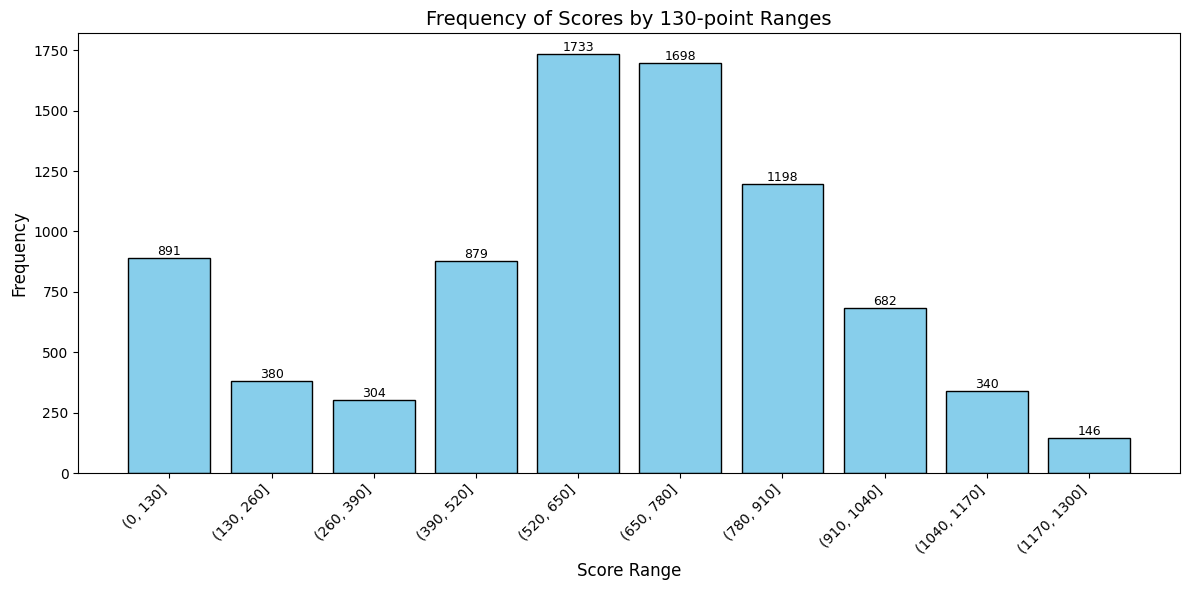

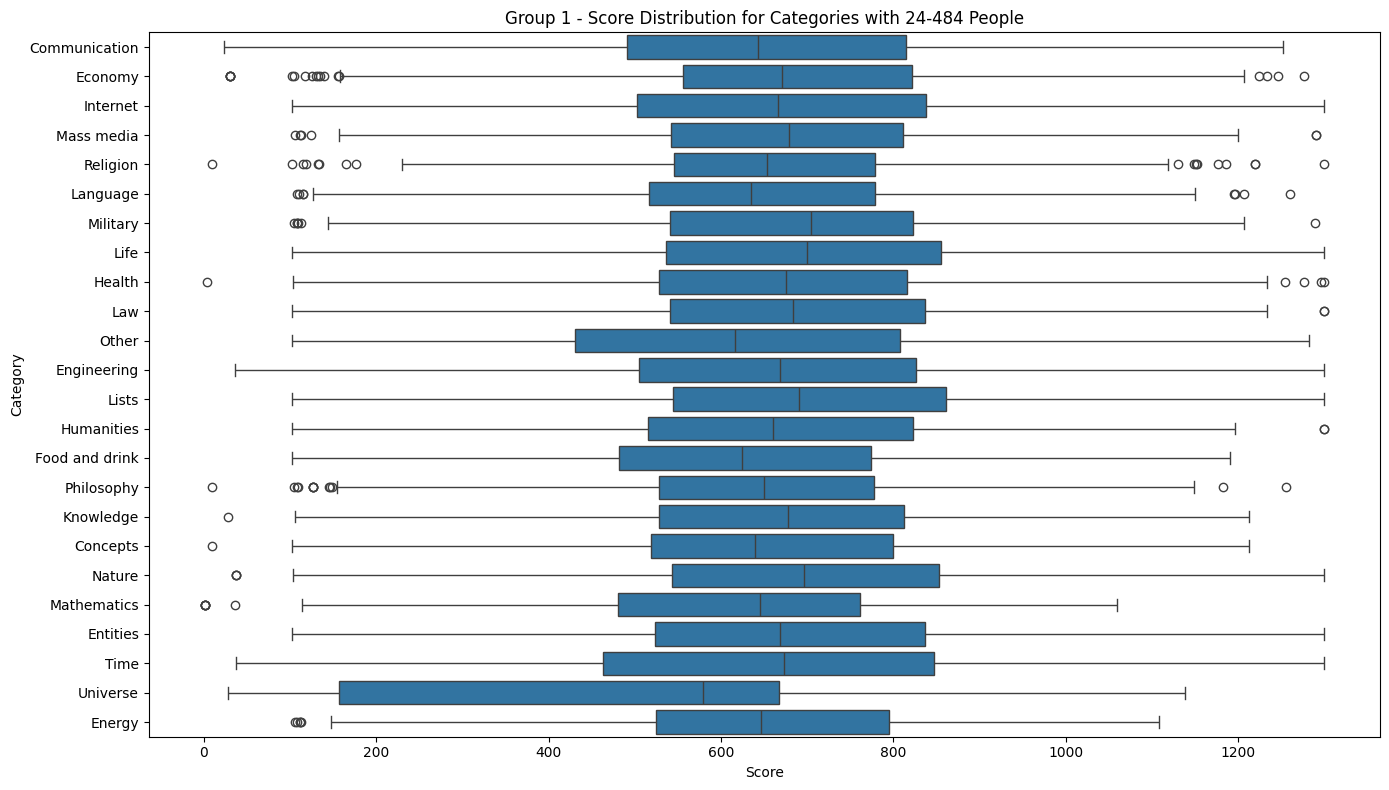

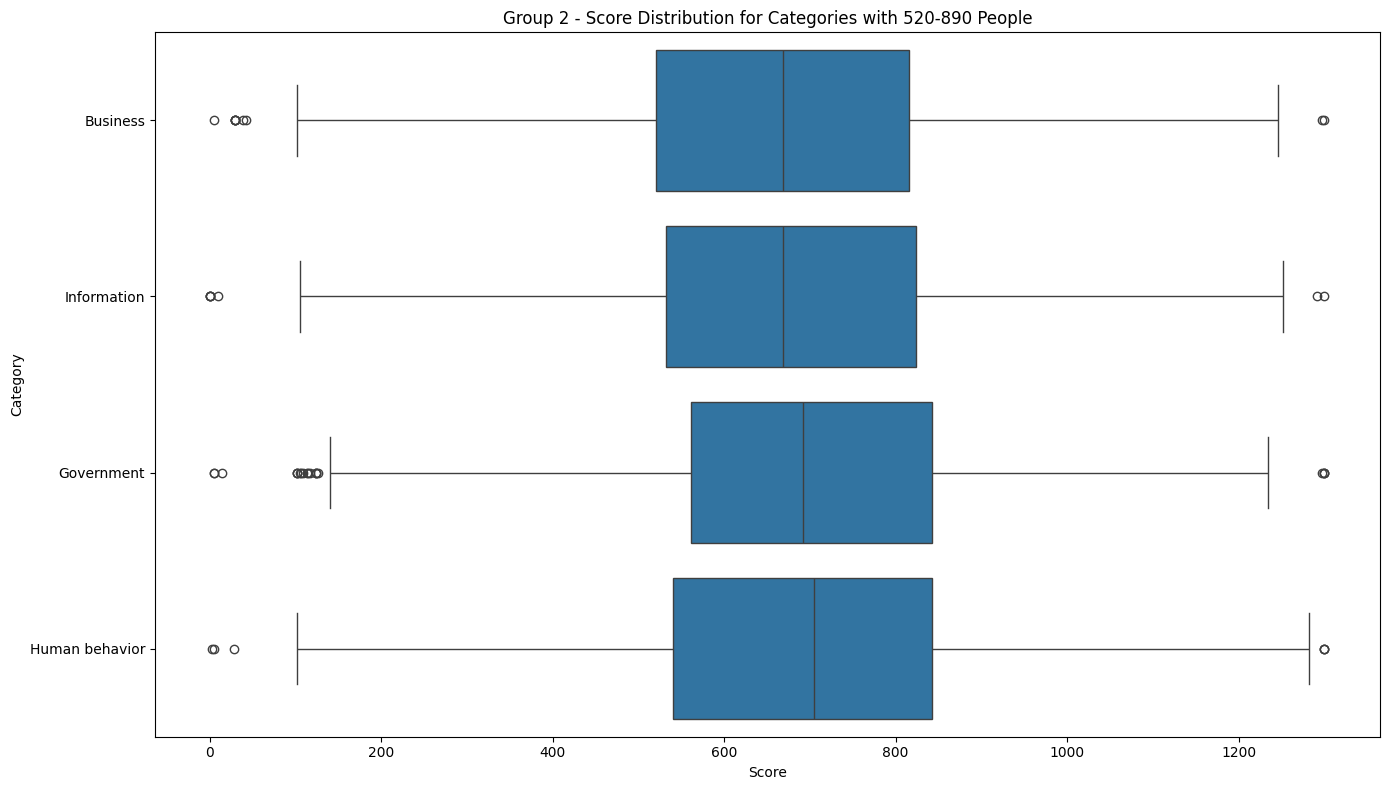

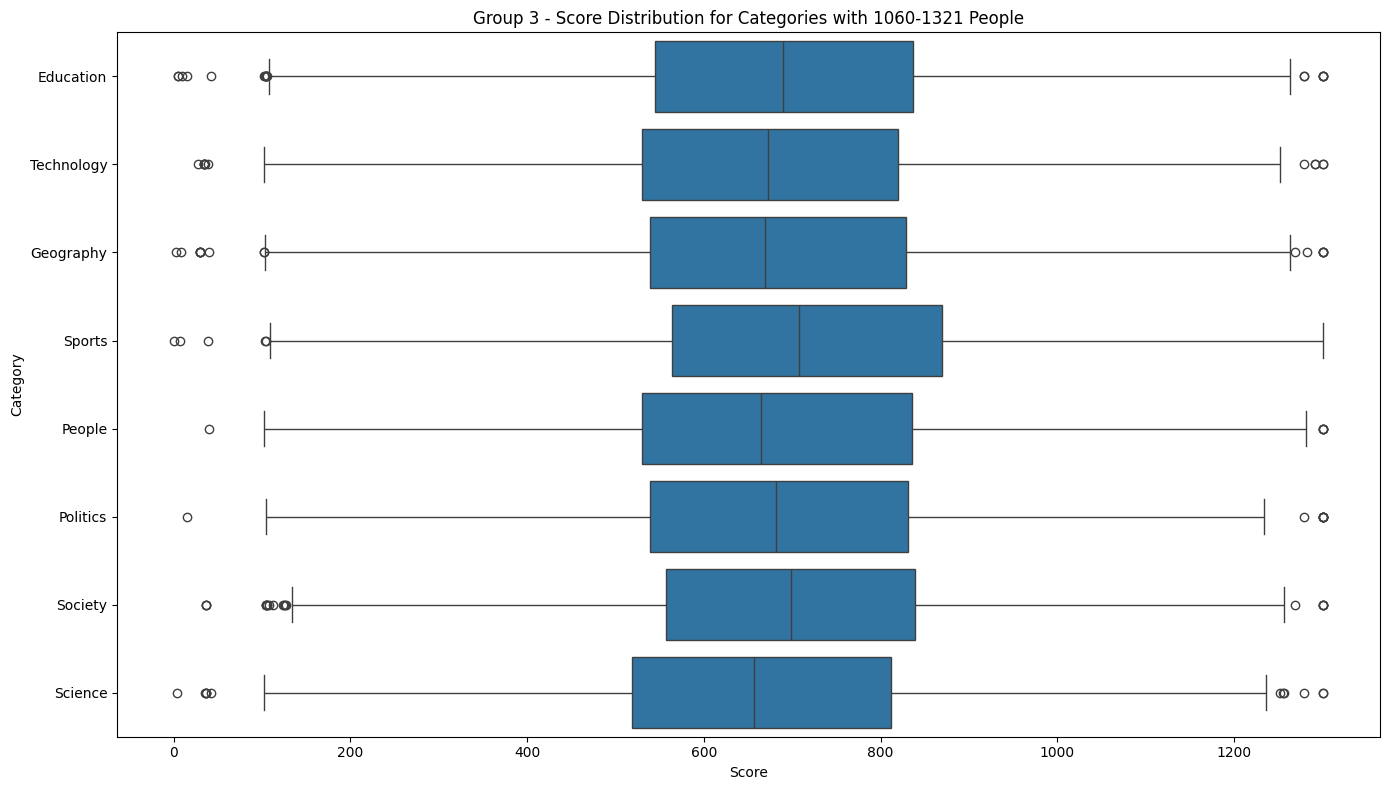

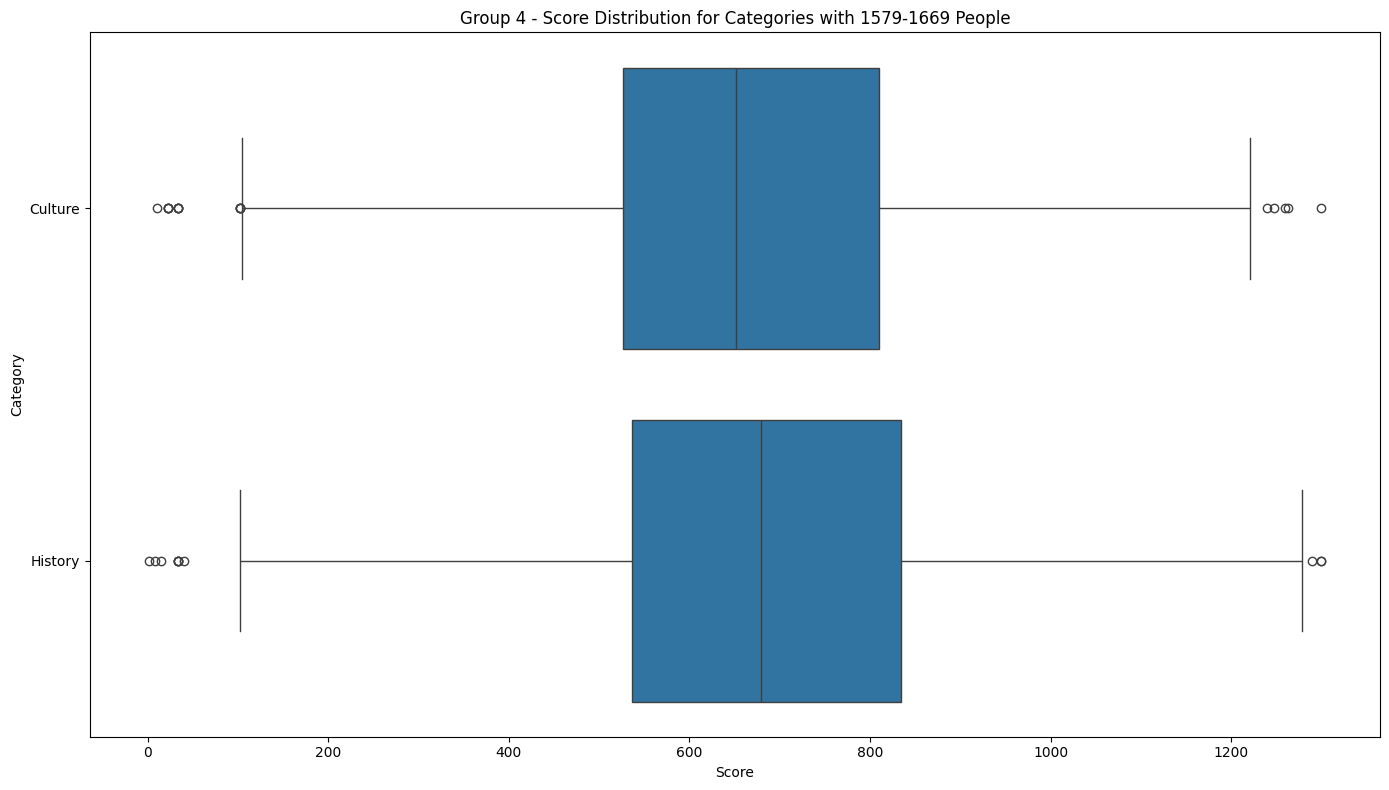

,username,total_score,Category
0,-Midorihana-,693,Education
1,-Midorihana-,693,Technology
4,131.211.210.14,30,Business
5,131.211.210.14,30,Communication
6,131.211.210.14,30,Economy
...,...,...,...
26488,Вasil,629,History
26489,石,420,Energy
26490,石,420,Engineering
26491,石,420,Science


In [13]:
import numpy as np 
plot_score_frequency(data, score_column='total_score')

# Plot score distribution grouped by user count similarity, with categories having at least 20 people
plot_score_distribution_grouped(data, categories_df, categories_to_include)


Let us notice that the boxplot for categories like, time, universe and others are not really significant since there are not enough users in these categories to fair results

In [14]:
filtered = pd.read_csv("../../data/scores.csv")

Support Ratio Stats:
       support_ratio  supportive_votes    total_votes
count  118605.000000     118605.000000  118605.000000
mean        0.761949         93.737861     125.628270
std         0.233825         74.521678     105.631661
min         0.000000          0.000000       1.000000
25%         0.633721         47.000000      60.000000
50%         0.816901         77.000000      94.000000
75%         0.963855        115.000000     152.000000
max         1.000000        420.000000     628.000000


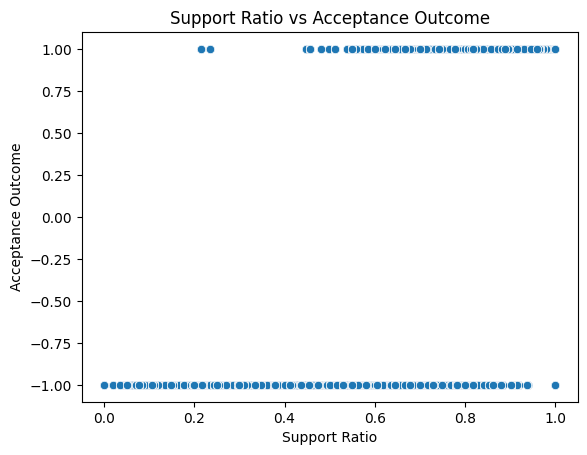

Insufficient data for T-test.


In [15]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind
from sklearn.preprocessing import StandardScaler
import numpy as np

# Parse the wiki-RfA.txt file
def parse_wiki_rfa(file_path):
    data = []
    with open(file_path, 'r') as file:
        block = {}
        for line in file:
            if line.strip():
                key, value = line.split(":", 1)
                block[key.strip()] = value.strip()
            else:  # End of a block
                if block:
                    data.append(block)
                block = {}
        if block:  # Add last block
            data.append(block)
    return pd.DataFrame(data)

# Load and clean data
wiki_data = parse_wiki_rfa("../../data/wiki-RfA.txt")
scores_data = pd.read_csv("../../data/scores.csv")
scores_data['username'] = scores_data['username'].str.strip()
wiki_data['TGT'] = wiki_data['TGT'].str.strip()

# Merge and filter data
merged_data = pd.merge(wiki_data, scores_data, left_on='TGT', right_on='username', how='left')
merged_data['RES'] = pd.to_numeric(merged_data['RES'], errors='coerce')
merged_data['VOT'] = pd.to_numeric(merged_data['VOT'], errors='coerce')
wiki_data['VOT'] = pd.to_numeric(wiki_data['VOT'], errors='coerce')  # Convert strings to numeric
wiki_data['RES'] = pd.to_numeric(wiki_data['VOT'], errors='coerce')  # Convert strings to numeric

merged_data = merged_data.dropna(subset=['total_score', 'RES'])

# Scale the total_score
scaler = StandardScaler()
merged_data['scaled_total_score'] = scaler.fit_transform(merged_data[['total_score']])

# Compute vote ratios
votes_summary = wiki_data.groupby('TGT').agg(
    total_votes=('VOT', 'size'),
    supportive_votes=('VOT', lambda x: np.sum(x == 1)),  # Count 1 as supportive votes
    opposing_votes=('VOT', lambda x: np.sum(x == -1))   # Count -1 as opposing votes
)
votes_summary['support_ratio'] = votes_summary['supportive_votes'] / votes_summary['total_votes']
votes_summary = votes_summary[votes_summary['total_votes'] > 0]  # Exclude invalid rows

# Merge vote ratios with merged data
analysis_data = pd.merge(merged_data, votes_summary, left_on='TGT', right_index=True, how='left')

# Check support ratio stats
print("Support Ratio Stats:")
print(analysis_data[['support_ratio', 'supportive_votes', 'total_votes']].describe())

# Plot support ratio vs RES
sns.scatterplot(x='support_ratio', y='RES', data=analysis_data)
plt.title('Support Ratio vs Acceptance Outcome')
plt.xlabel('Support Ratio')
plt.ylabel('Acceptance Outcome')
plt.show()

# T-test for total_score
approved_scores = merged_data[merged_data['RES'] == 1]['total_score']
rejected_scores = merged_data[merged_data['RES'] == 0]['total_score']
if not approved_scores.empty and not rejected_scores.empty:
    t_stat, p_val = ttest_ind(approved_scores, rejected_scores)
    print(f"T-test results: t-statistic = {t_stat}, p-value = {p_val}")
else:
    print("Insufficient data for T-test.")


In [16]:
print(wiki_data['VOT'].unique())
print(wiki_data['VOT'].value_counts())

print(votes_summary[['support_ratio', 'supportive_votes', 'opposing_votes', 'total_votes']].describe())



[ 1 -1  0]
VOT
 1    144451
-1     41176
 0     12648
Name: count, dtype: int64
       support_ratio  supportive_votes  opposing_votes  total_votes
count    3497.000000       3497.000000     3497.000000  3497.000000
mean        0.592337         41.307120       11.774664    56.698599
std         0.379978         48.105142       18.852814    62.617657
min         0.000000          0.000000        0.000000     1.000000
25%         0.181818          3.000000        1.000000    15.000000
50%         0.727273         28.000000        6.000000    41.000000
75%         0.960000         64.000000       15.000000    77.000000
max         1.000000        600.000000      334.000000   987.000000


In [17]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score, classification_report

# Train a simple Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, max_depth=None, random_state=42)
rf_model.fit(X_train, y_train)

# Predictions and evaluation
y_pred = rf_model.predict(X_test)
y_prob = rf_model.predict_proba(X_test)[:, 1]
roc_auc = roc_auc_score(y_test, y_prob)
classification_report_result = classification_report(y_test, y_pred)

print(f"ROC AUC Score: {roc_auc}")
print("Classification Report:")
print(classification_report_result)

NameError: name 'X_train' is not defined

In [ ]:
import numpy as np

# Assuming log_reg_combined is your trained logistic regression model with combined predictors
def predict_acceptance_probability(admin_score, support_ratio, model, scaler=None):
    """
    Predicts the probability of acceptance for a given admin score and support ratio.

    Args:
        admin_score (float): Admin score of the user.
        support_ratio (float): Ratio of supportive votes to total votes.
        model (object): Trained logistic regression model.
        scaler (object): Scaler object for feature scaling (if used).

    Returns:
        float: Probability of acceptance.
    """
    # Create input features as a numpy array
    input_features = np.array([[admin_score, support_ratio]])
    
    # Scale the features if a scaler is used
    if scaler:
        input_features[:, 0] = scaler.transform(input_features[:, [0]])
    
    # Predict probability
    probability = model.predict_proba(input_features)[0, 1]  # Probability for class 1 (acceptance)
    return probability

# Example usage
admin_score = 1000  # Example admin score
support_ratio = 0.9  # Example support ratio
probability = predict_acceptance_probability(admin_score, support_ratio, log_reg_combined, scaler)
print(f"Probability of acceptance: {probability:.2f}")


Probability of acceptance: 0.70
0.9


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


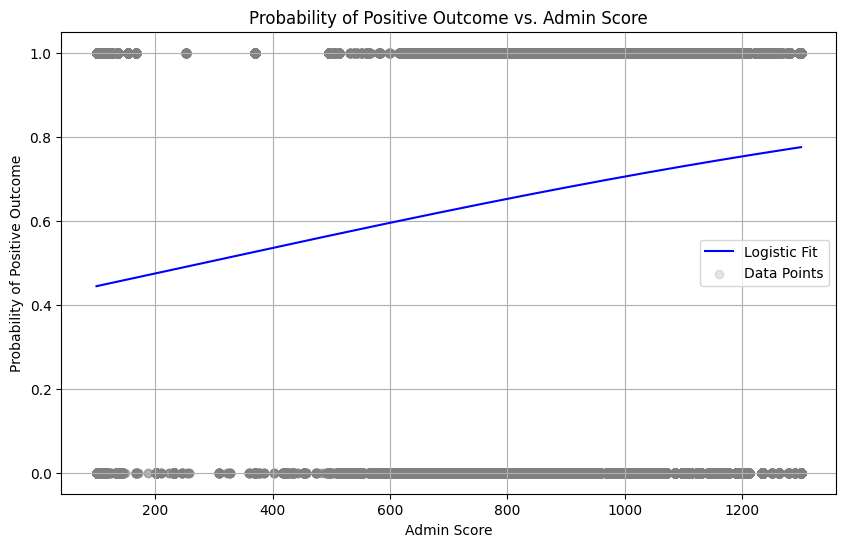

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

# Load your DataFrame (replace 'your_file.csv' with the actual file name)
# df = pd.read_csv('your_file.csv')
df = merged_data.copy()

# Ensure 'total_score' and 'RES' columns exist and clean the data
# Convert RES: -1 (negative outcome) -> 0, 1 (positive outcome) -> 1
df['RES'] = df['RES'].apply(lambda x: 0 if x == -1 else 1)
df = df[['total_score', 'RES']].dropna()

# Prepare the data for logistic regression
X = df[['total_score']].values
y = df['RES'].values

# Standardize the 'total_score' for better numerical stability
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Fit a logistic regression model
model = LogisticRegression()
model.fit(X_scaled, y)

# Generate a range of scores to predict probabilities
score_range = np.linspace(df['total_score'].min(), df['total_score'].max(), 300).reshape(-1, 1)
score_range_scaled = scaler.transform(score_range)

# Predict probabilities using the logistic regression model
probabilities = model.predict_proba(score_range_scaled)[:, 1]

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(score_range, probabilities, color='blue', label='Logistic Fit')
plt.scatter(df['total_score'], df['RES'], alpha=0.2, color='gray', label='Data Points')
plt.title('Probability of Positive Outcome vs. Admin Score')
plt.xlabel('Admin Score')
plt.ylabel('Probability of Positive Outcome')
plt.legend()
plt.grid()
plt.show()


In [5]:
import pandas as pd

file_name = '../../data/all_features_dataframe.csv'
df_full = pd.read_csv(file_name)
# Display the first few rows of the DataFrame
print(df_full.head())

#Load and Parse `wiki-RfA.txt` for RfA outcomes, linking with categories
data = []

# Read and parse the text file
with open('../../data/wiki-RfA.txt', 'r', encoding='utf-8') as file:
    record = {}
    for line in file:
        line = line.strip()
        if line.startswith('SRC:'):
            if record:  # If there's an existing record, append it to the data list
                data.append(record)
                record = {}
            record['SRC'] = line.split(':', 1)[1].strip()
        elif line.startswith('TGT:'):
            record['TGT'] = line.split(':', 1)[1].strip()
        elif line.startswith('VOT:'):
            record['VOT'] = int(line.split(':', 1)[1].strip())
        elif line.startswith('RES:'):
            record['RES'] = int(line.split(':', 1)[1].strip())
        elif line.startswith('YEA:'):
            record['YEA'] = int(line.split(':', 1)[1].strip())
        elif line.startswith('DAT:'):
            record['DAT'] = line.split(':', 1)[1].strip()
        elif line.startswith('TXT:'):
            record['TXT'] = line.split(':', 1)[1].strip()
    if record:  # Add the last record to the data list
        data.append(record)

# Convert the list of records into a DataFrame
df = pd.DataFrame(data)

# Display the DataFrame
print(df.head(20))

            username  total_score         categ1  categ2     categ3  \
0  !---slappdash---!        394.0  Entertainment   Music   Business   
1             %D0%90        665.0      Education    Film  Geography   
2               'sed        195.0      Animation  Comedy      Media   
3              (.Y.)        131.0          Music   Lists     People   
4         (:Julien:)        592.0            NaN     NaN        NaN   

       categ4                                          articles1  \
0      Sports                             ['Rupture (band)', 30]   
1       Media  ['List of Sundance Film Festival award winners...   
2  Television                          ['The Mansion Family', 1]   
3      Sports                                      ['Slayer', 2]   
4         NaN     ['2012 FIBA Europe Under-18 Championship', 11]   

                                           articles2  \
0                            ['The Cobra Group', 22]   
1  ['List of films at the 2008 Sundance Film Fest...

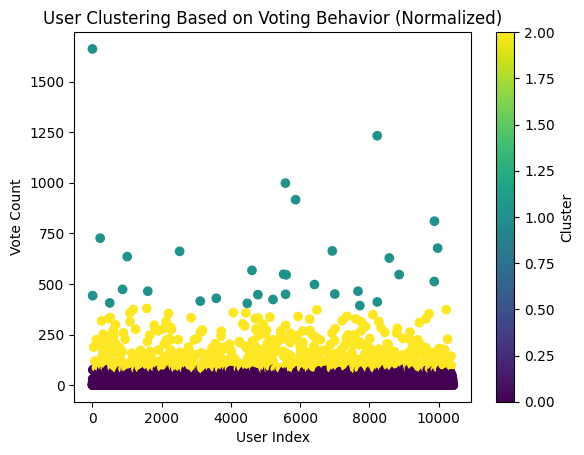

                     SRC  Cluster  VoteCount
0                               1       1661
1      !---slappdash---!        0          1
2                 %D0%90        0         13
3                   'sed        0          3
4                  (.Y.)        0          1
...                  ...      ...        ...
10412             とある白い猫        0          1
10413                  シ        0          6
10414                  石        0          1
10415                  龗        0          2
10416                완젬스        0          1

[10417 rows x 3 columns]


In [10]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import pandas as pd

# Load your DataFrame (if not already loaded)
# df = pd.read_csv('votes_output.csv')

# Step 1: Preprocessing
# Group by users and aggregate text comments
user_data = df.groupby('SRC').agg({
    'TXT': ' '.join,  # Combine all TXT comments for each user
    'TGT': 'count',   # Count the number of votes per user
}).reset_index()

user_data.rename(columns={'TGT': 'VoteCount'}, inplace=True)

# Step 2: Text Vectorization
vectorizer = TfidfVectorizer(stop_words='english', max_features=500)
text_features = vectorizer.fit_transform(user_data['TXT'])

# Step 3: Normalize Numeric Features
scaler = StandardScaler()
normalized_vote_count = scaler.fit_transform(user_data[['VoteCount']])

# Step 4: Combine Normalized Numeric and Text Features
from scipy.sparse import hstack
features = hstack([text_features, normalized_vote_count])

# Step 5: Clustering with K-Means
kmeans = KMeans(n_clusters=3, random_state=42)
user_data['Cluster'] = kmeans.fit_predict(features)

# Step 6: Visualizing Clusters
plt.scatter(user_data.index, user_data['VoteCount'], c=user_data['Cluster'], cmap='viridis')
plt.title('User Clustering Based on Voting Behavior (Normalized)')
plt.xlabel('User Index')
plt.ylabel('Vote Count')
plt.colorbar(label='Cluster')
plt.show()

# Step 7: Analyze Clusters
print(user_data[['SRC', 'Cluster', 'VoteCount']])
